In [1]:
from skin_lesion_preprocessing import *
from skin_lesion_feature_extraction import *
%matplotlib inline

In [2]:
# Initialize lists to store data
tr_image_names = []
tr_image_files = []
resized_imgs = []
tr_gtruth = []

# Paths to your image directories
tr_nevus = "train/nevus"
tr_others = "train/others"

# Process all images
for nevus_img in tqdm(os.listdir(tr_nevus), desc="Nevus"):
    img_path = os.path.join(tr_nevus, nevus_img)
    resized_images = np.array(load_and_resize_image(img_path))
    resized_imgs.append(resized_images)
    tr_image_names.append(nevus_img)
    tr_image_files.append(img_path)
    tr_gtruth.append(0)

for others_img in tqdm(os.listdir(tr_others), desc="Others"):
    img_path = os.path.join(tr_others, others_img)
    resized_images = np.array(load_and_resize_image(img_path))
    resized_imgs.append(resized_images)
    tr_image_names.append(others_img)
    tr_image_files.append(img_path)
    tr_gtruth.append(1)

Others: 100%|██████████| 7470/7470 [02:23<00:00, 51.95it/s]


In [3]:
# Create a dataframe
tr_data = {
    "tr_img_name": tr_image_names,
    "tr_img_file": tr_image_files,
    "resized_images": resized_imgs,
    "tr_gtruth": tr_gtruth
}

tr_df = pd.DataFrame(tr_data)
tr_df = shuffle(tr_df).reset_index(drop=True)

tr_df.head()

tr_img_name                tr_img_file  \
0  nev06722.jpg   train/nevus\nev06722.jpg   
1  bcc01102.jpg  train/others\bcc01102.jpg   
2  bkl00531.jpg  train/others\bkl00531.jpg   
3  bcc00914.jpg  train/others\bcc00914.jpg   
4  bcc00299.jpg  train/others\bcc00299.jpg   

                                      resized_images  tr_gtruth  
0  [[[187, 153, 169], [187, 153, 171], [188, 154,...          0  
1  [[[173, 176, 179], [172, 176, 179], [173, 175,...          1  
2  [[[1, 1, 1], [1, 1, 1], [2, 2, 2], [2, 2, 2], ...          1  
3  [[[1, 1, 1], [1, 1, 1], [0, 2, 1], [0, 2, 1], ...          1  
4  [[[188, 169, 191], [187, 168, 192], [187, 168,...          1

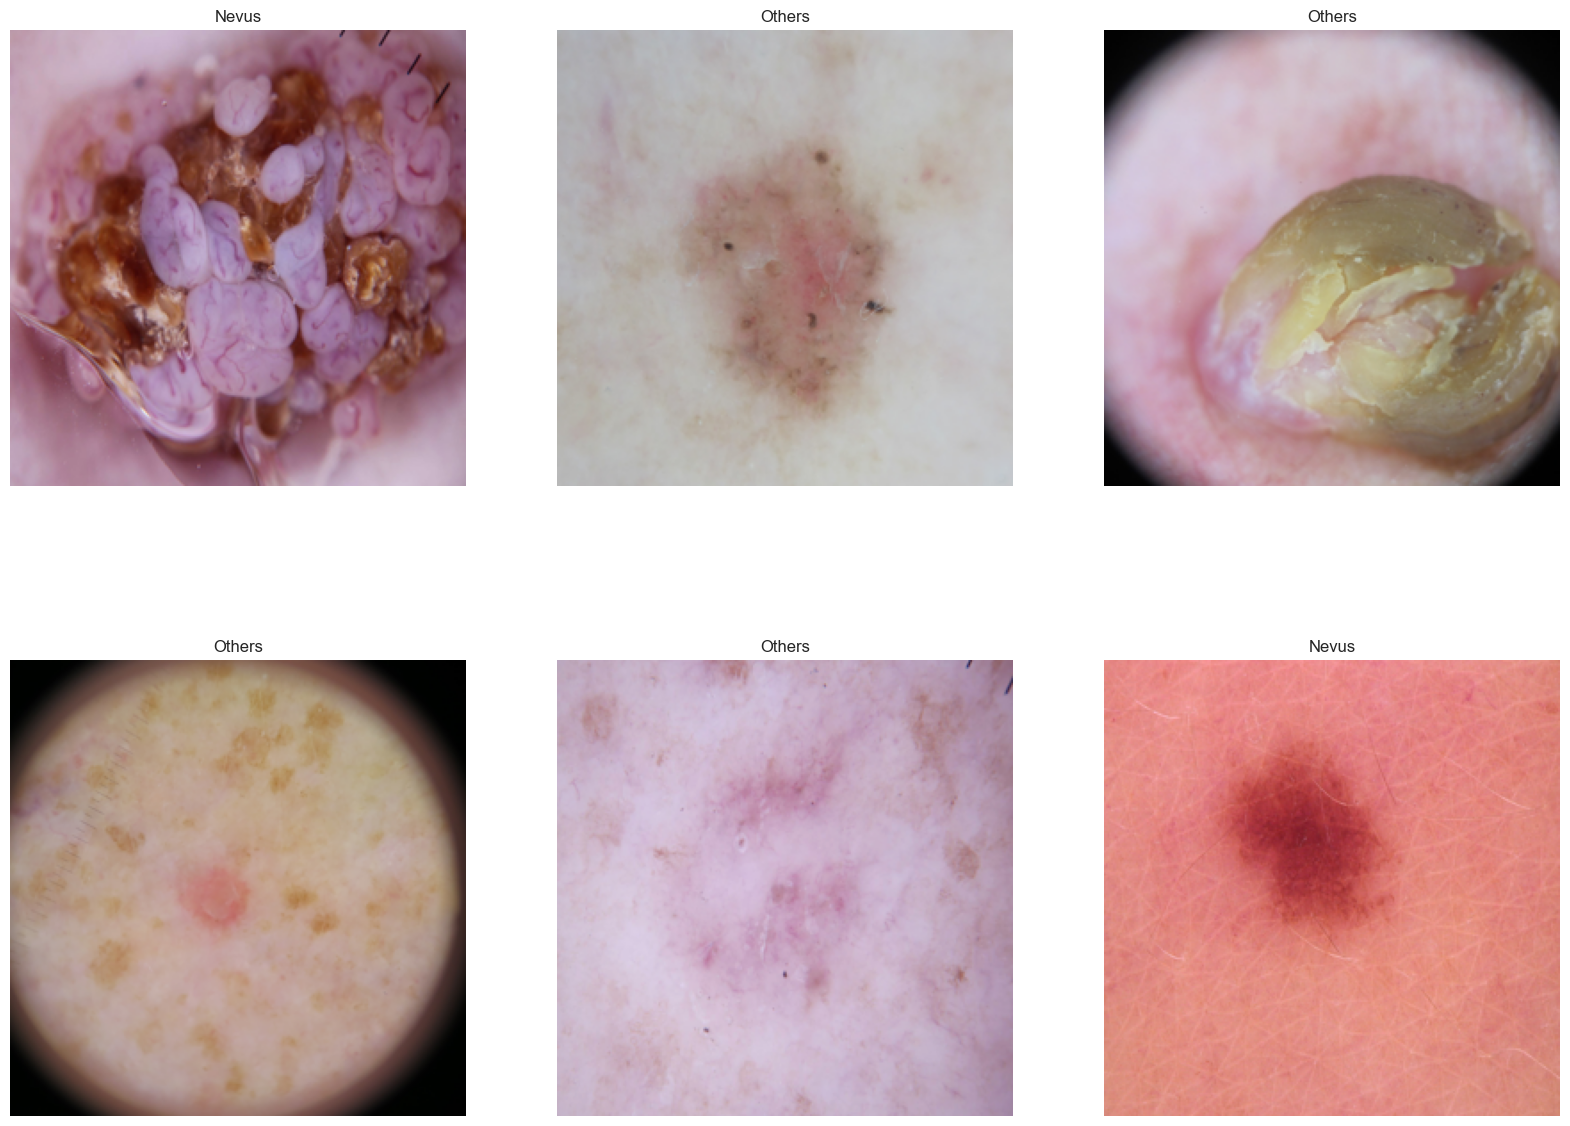

In [4]:
# Set the seaborn style
sns.set_style("white")

# Create a figure
plt.figure(figsize=[20, 15])

for i, (image_path, ground_truth) in enumerate(zip(tr_df["resized_images"][:6], tr_df["tr_gtruth"][:6])):
    # Set the title based on ground truth
    title = "Nevus" if ground_truth == 0 else "Others"
    
    # Plot the image
    plt.subplot(2, 3, i + 1)
    plt.imshow(image_path)
    plt.axis("off")
    plt.title(title)

plt.show()

In [5]:
# Paths to your image directories
val_nevus = "val/nevus"
val_others = "val/others"

# Initialize lists to store validation data
val_image_names = []
val_image_files = []
val_resized_imgs = []
val_gtruth = []

# Process all images for Nevus in the validation set (groundtruth = 0)
for val_nevus_img in tqdm(os.listdir(val_nevus), desc="Nevus"):
    val_img_path = os.path.join(val_nevus, val_nevus_img)
    val_resized_images = np.array(load_and_resize_image(val_img_path))
    val_resized_imgs.append(val_resized_images)
    val_image_names.append(val_nevus_img)
    val_image_files.append(val_img_path)
    val_gtruth.append(0)

# Process all images for Others in the validation set (groundtruth = 1)
for val_others_img in tqdm(os.listdir(val_others), desc="Others"):
    val_img_path = os.path.join(val_others, val_others_img)
    val_resized_images = np.array(load_and_resize_image(val_img_path))
    val_resized_imgs.append(val_resized_images)
    val_image_names.append(val_others_img)
    val_image_files.append(val_img_path)
    val_gtruth.append(1)

Others: 100%|██████████| 1865/1865 [00:38<00:00, 48.02it/s]


In [6]:
# Create a dataframe
val_data = {
    "val_img_name": val_image_names,
    "val_img_file": val_image_files,
    "val_resized_images": val_resized_imgs,
    "val_gtruth": val_gtruth
}

val_df = pd.DataFrame(val_data)
val_df = shuffle(val_df).reset_index(drop=True)

val_df.head()

val_img_name             val_img_file  \
0  mel03080.jpg  val/others\mel03080.jpg   
1  nev08820.jpg   val/nevus\nev08820.jpg   
2  nev08828.jpg   val/nevus\nev08828.jpg   
3  mel03211.jpg  val/others\mel03211.jpg   
4  ack00619.jpg  val/others\ack00619.jpg   

                                  val_resized_images  val_gtruth  
0  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...           1  
1  [[[190, 191, 199], [191, 191, 199], [192, 192,...           0  
2  [[[29, 17, 18], [28, 17, 18], [27, 15, 19], [2...           0  
3  [[[4, 4, 4], [4, 4, 4], [4, 4, 4], [4, 4, 4], ...           1  
4  [[[1, 1, 1], [1, 1, 1], [2, 2, 2], [2, 2, 2], ...           1

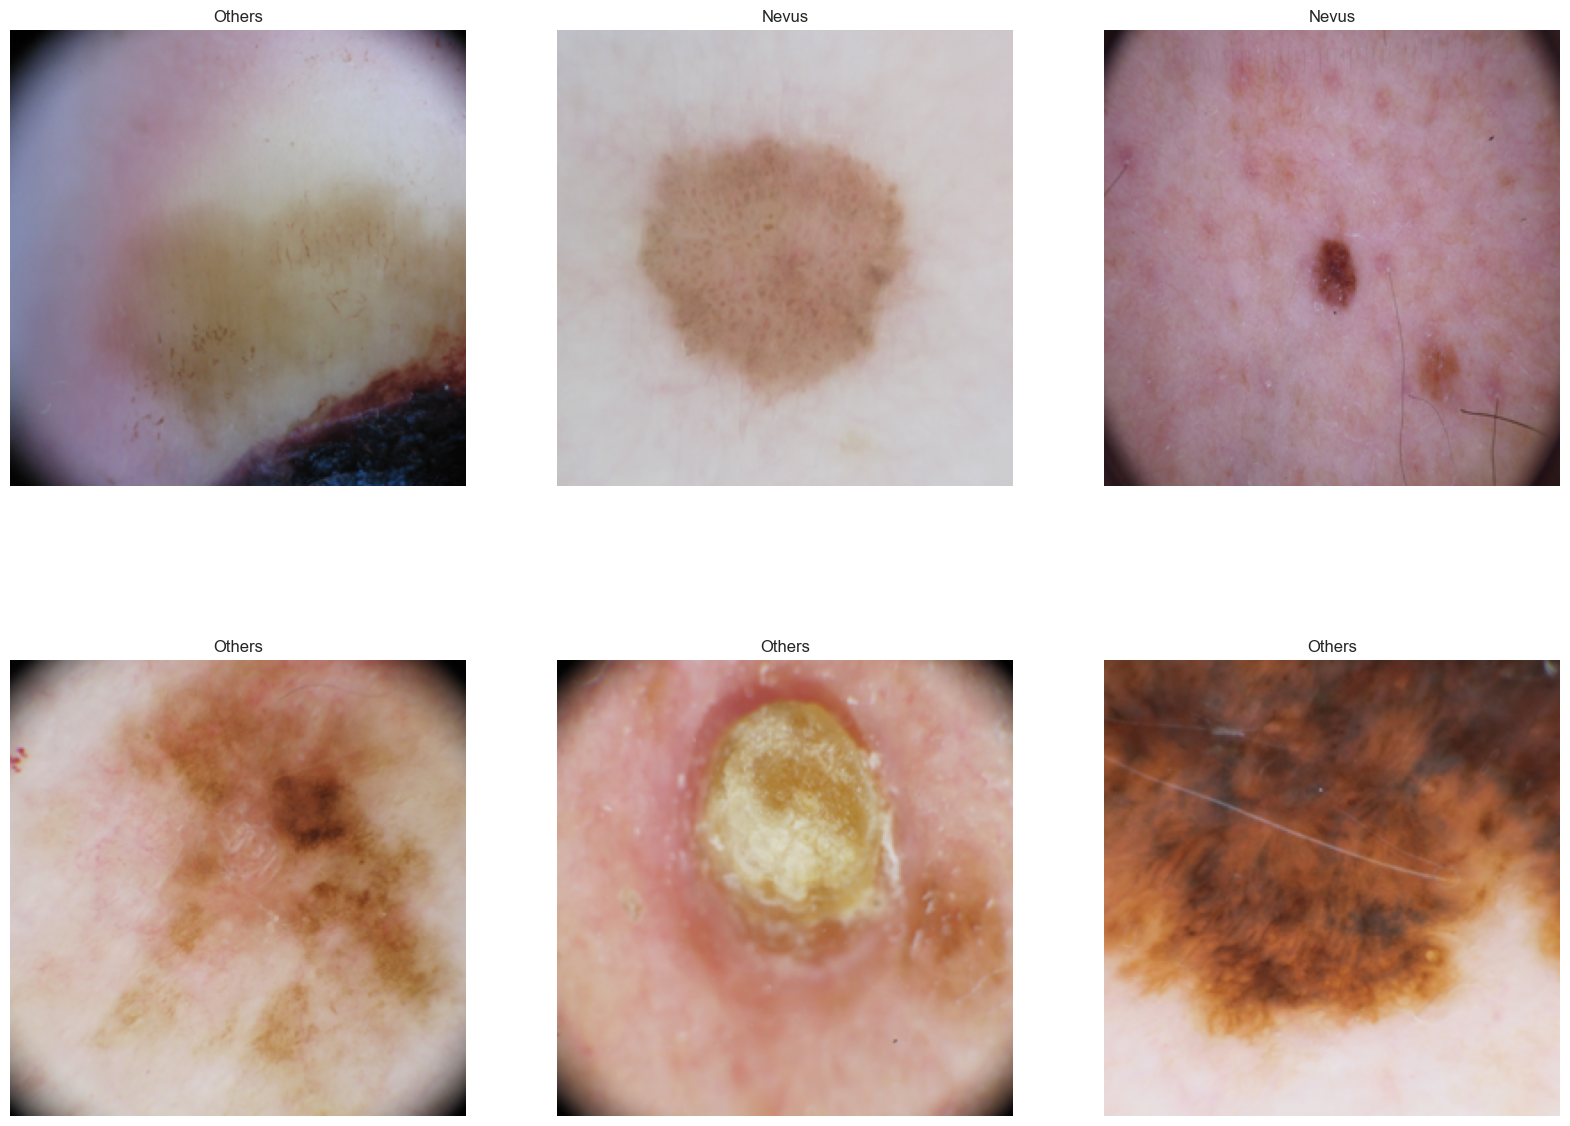

In [7]:
# Set the seaborn style
sns.set_style("white")

# Create a figure
plt.figure(figsize=[20, 15])

for i, (image_path, ground_truth) in enumerate(zip(val_df["val_resized_images"][:6], val_df["val_gtruth"][:6])):
    # Set the title based on ground truth
    title = "Nevus" if ground_truth == 0 else "Others"
    
    # Plot the image
    plt.subplot(2, 3, i + 1)
    plt.imshow(image_path)
    plt.axis("off")
    plt.title(title)

plt.show()

In [8]:
intensity_features = pd.DataFrame()
intensity_features_list = []

glcm_features = pd.DataFrame()
glcm_features_list = []

lbp_features = pd.DataFrame()
lbp_features_list = []

shape_features = pd.DataFrame()
shape_features_list = []

for index, row in tr_df.iterrows():
    resized_image = row['resized_images']
    intensity_feature = extract_intensity_and_color_features(resized_image)
    intensity_features_list.append(pd.DataFrame(intensity_feature, index=[0]))
    glcm_feature = extract_glcm_features(resized_image)
    glcm_features_list.append(pd.DataFrame(glcm_feature, index=[0]))
    lbp_feature = extract_lbp_features(resized_image)
    lbp_features_list.append(pd.DataFrame(lbp_feature, index=[0]))
    shape_feature = extract_shape_features(resized_image)
    shape_features_list.append(pd.DataFrame(shape_feature, index=[0]))

intensity_features = pd.concat(intensity_features_list, ignore_index=True)
glcm_features = pd.concat(glcm_features_list, ignore_index=True)
lbp_features = pd.concat(lbp_features_list, ignore_index=True)
shape_features = pd.concat(shape_features_list, ignore_index=True)


# Combine intensity features with the original DataFrame
train_df = pd.concat([tr_df, intensity_features, glcm_features, lbp_features, shape_features], axis=1)
train_df.head()

tr_img_name                tr_img_file  \
0  nev06722.jpg   train/nevus\nev06722.jpg   
1  bcc01102.jpg  train/others\bcc01102.jpg   
2  bkl00531.jpg  train/others\bkl00531.jpg   
3  bcc00914.jpg  train/others\bcc00914.jpg   
4  bcc00299.jpg  train/others\bcc00299.jpg   

                                      resized_images  tr_gtruth  \
0  [[[187, 153, 169], [187, 153, 171], [188, 154,...          0   
1  [[[173, 176, 179], [172, 176, 179], [173, 175,...          1   
2  [[[1, 1, 1], [1, 1, 1], [2, 2, 2], [2, 2, 2], ...          1   
3  [[[1, 1, 1], [1, 1, 1], [0, 2, 1], [0, 2, 1], ...          1   
4  [[[188, 169, 191], [187, 168, 192], [187, 168,...          1   

   mean_intensity  std_intensity  max_intensity  min_intensity      mean_r  \
0      127.205195      44.261808            240              5  152.361984   
1      175.082016      22.065531            207             48  182.196198   
2      152.528687      50.978879            225              0  167.434341   
3      131.878718      55.082293            203              0  153.663437   
4      188.895121      19.831206            235             42  198.768097   

       mean_g  ...   area  circularity  compactness  hu_moments_1  \
0  106.709564  ...  822.5     0.026931    37.132427      0.409312   
1  173.271057  ...   42.5     0.090857    11.006300      0.342729   
2  145.344528  ...  111.0     0.005084   196.707152      3.426937   
3  128.352966  ...   23.5     0.061393    16.288536      0.605366   
4  172.718430  ...  166.5     0.095804    10.438004      0.194313   

   hu_moments_2  hu_moments_3  hu_moments_4  hu_moments_5  hu_moments_6  \
0      0.069821      0.020622      0.004822 -3.371418e-05 -4.076684e-04   
1      0.051022      0.011600      0.001405  5.667028e-06 -3.862830e-05   
2      7.980715      0.871974      0.343612  1.490217e-01  8.613647e-01   
3      0.057265      0.121092      0.069588  4.519697e-03  1.428591e-02   
4      0.005335      0.000216      0.000248  2.681339e-08 -8.088507e-07   

   hu_moments_7  
0  3.428411e-05  
1  1.898400e-07  
2  1.147542e-01  
3  4.514138e-03  
4  5.094516e-08  

[5 rows x 175 columns]

In [9]:
val_intensity_features = pd.DataFrame()
val_intensity_features_list = []

val_glcm_features = pd.DataFrame()
val_glcm_features_list = []

val_lbp_features = pd.DataFrame()
val_lbp_features_list = []

val_shape_features = pd.DataFrame()
val_shape_features_list = []

for index, row in val_df.iterrows():
    val_resized_image = row['val_resized_images']
    intensity_val_feature = extract_intensity_and_color_features(val_resized_image)
    glcm_val_feature = extract_glcm_features(val_resized_image)
    lbp_val_feature = extract_lbp_features(val_resized_image)
    val_intensity_features_list.append(pd.DataFrame(intensity_val_feature, index=[0]))
    val_glcm_features_list.append(pd.DataFrame(glcm_val_feature, index=[0]))
    val_lbp_features_list.append(pd.DataFrame(lbp_val_feature, index=[0]))
    shape_val_feature = extract_shape_features(val_resized_image)
    val_shape_features_list.append(pd.DataFrame(shape_val_feature, index=[0]))

val_intensity_features = pd.concat(val_intensity_features_list, ignore_index=True)
val_glcm_features = pd.concat(val_glcm_features_list, ignore_index=True)
val_lbp_features = pd.concat(val_lbp_features_list, ignore_index=True)
val_shape_features = pd.concat(val_shape_features_list, ignore_index=True)

# Combine intensity features with the original DataFrame
validation_df = pd.concat([val_df, val_intensity_features, val_glcm_features, val_lbp_features, val_shape_features], axis=1)
validation_df.head()

val_img_name             val_img_file  \
0  mel03080.jpg  val/others\mel03080.jpg   
1  nev08820.jpg   val/nevus\nev08820.jpg   
2  nev08828.jpg   val/nevus\nev08828.jpg   
3  mel03211.jpg  val/others\mel03211.jpg   
4  ack00619.jpg  val/others\ack00619.jpg   

                                  val_resized_images  val_gtruth  \
0  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...           1   
1  [[[190, 191, 199], [191, 191, 199], [192, 192,...           0   
2  [[[29, 17, 18], [28, 17, 18], [27, 15, 19], [2...           0   
3  [[[4, 4, 4], [4, 4, 4], [4, 4, 4], [4, 4, 4], ...           1   
4  [[[1, 1, 1], [1, 1, 1], [2, 2, 2], [2, 2, 2], ...           1   

   mean_intensity  std_intensity  max_intensity  min_intensity      mean_r  \
0      131.012080      45.104350            217              1  137.382004   
1      181.845205      27.504161            214             79  192.732803   
2      139.844869      28.673071            198             13  161.867371   
3      158.356384      44.339583            221              1  187.298889   
4      157.705048      38.400470            223              1  194.117523   

       mean_g  ...   area  circularity  compactness  hu_moments_1  \
0  125.217422  ...   61.5     0.121238     8.248269      0.260205   
1  178.095718  ...    4.5     0.038380    26.055274      2.416400   
2  123.364410  ...  105.5     0.016139    61.961350      1.599415   
3  153.416840  ...   49.5     0.251842     3.970738      0.210452   
4  149.446533  ...  109.5     0.007311   136.777987      1.262114   

   hu_moments_2  hu_moments_3  hu_moments_4  hu_moments_5  hu_moments_6  \
0      0.021671      0.000651      0.001148  9.907361e-07      0.000040   
1      2.081300      7.986800      0.700899  9.071543e-01     -0.863000   
2      2.119428      0.066058      0.022126  4.928387e-04      0.027640   
3      0.004855      0.000915      0.000522  3.453587e-07     -0.000011   
4      0.821069      1.057905      0.952630  9.215826e-01      0.862032   

   hu_moments_7  
0 -5.129907e-08  
1  1.388205e+00  
2  6.874810e-04  
3 -1.037854e-07  
4 -2.554630e-01  

[5 rows x 175 columns]

In [27]:
train_features = train_df.drop(columns=['tr_img_name', 'tr_img_file', 'resized_images', 'tr_gtruth'])
train_labels = train_df['tr_gtruth']

validation_features = validation_df.drop(columns=['val_img_name', 'val_img_file', 'val_resized_images', 'val_gtruth'])
validation_labels = validation_df['val_gtruth']

In [28]:


# Define features and labels for training
X_train = train_features
y_train = train_labels

# Define features and labels for validation
X_val = validation_features
y_val = validation_labels


scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaler = scaler.transform(X_train)
X_val_scaler = scaler.transform(X_val) 

In [29]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import xgboost as xgb
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# Define individual classifiers
random_forest = RandomForestClassifier(n_estimators=1000, max_depth=30, random_state=42)
xgboost = xgb.XGBClassifier(n_estimators=200, max_depth=10, random_state=42)

# Combine classifiers in a dictionary
classifiers = {
    'Random Forest': random_forest,
    'XGBoost': xgboost
}

# Perform 10-fold cross-validation and predictions for each classifier
for clf_name, clf in classifiers.items():
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    
    # Perform cross-validation
    cv_results = cross_val_score(clf, X_train_scaler, y_train, cv=skf)
    
    # Print cross-validation results
    print(f"\nClassifier: {clf_name}")
    print("Cross-validation Results:", cv_results)
    print("Average Cross-validation Accuracy:", np.mean(cv_results))
    
    # Fit the model on the entire training set (no need for additional scaling)
    clf.fit(X_train_scaler, y_train)
    
    # Make predictions on the validation set
    y_pred_val = clf.predict(X_val_scaler)
    
    # Evaluate the model
    acc_train = accuracy_score(y_train, clf.predict(X_train_scaler))
    acc_val = accuracy_score(y_val, y_pred_val)
    
    print("\nEvaluation on Validation Set:")
    print("Training Accuracy:", acc_train)
    print("Validation Accuracy:", acc_val)
    
    # Print confusion matrix for validation set
    print("\nConfusion Matrix (Validation Set):")
    print(confusion_matrix(y_val, y_pred_val))
    
    # Print classification report for validation set
    print("\nClassification Report (Validation Set):")
    print(classification_report(y_val, y_pred_val))



Classifier: Random Forest
Cross-validation Results: [0.80986842 0.80065789 0.81118421 0.81447368 0.82763158 0.81040158
 0.80118499 0.82949309 0.80052666 0.8202765 ]
Average Cross-validation Accuracy: 0.812569860711687

Evaluation on Validation Set:
Training Accuracy: 1.0
Validation Accuracy: 0.8279768177028451

Confusion Matrix (Validation Set):
[[1596  335]
 [ 318 1547]]

Classification Report (Validation Set):
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1931
           1       0.82      0.83      0.83      1865

    accuracy                           0.83      3796
   macro avg       0.83      0.83      0.83      3796
weighted avg       0.83      0.83      0.83      3796


Classifier: XGBoost
Cross-validation Results: [0.82697368 0.81907895 0.80921053 0.82302632 0.82434211 0.81500987
 0.80776827 0.82554312 0.81500987 0.82949309]
Average Cross-validation Accuracy: 0.8195455805412148

Evaluation on Validation Set:
Training Ac

In [41]:
import joblib

# Save the Random Forest model
joblib.dump(random_forest, 'Scalerrandom_forest_model.pkl')

# Save the XGBoost model
joblib.dump(xgboost, 'Scalerxgboost_model.pkl')


['Scalerxgboost_model.pkl']

In [18]:
# Paths to your image directories
test = "testX"

# Initialize lists to store test data
test_image_names = []
test_image_files = []
test_resized_imgs = []

# Process all images for test data
for test_img in tqdm(os.listdir(test), desc="Test"):
    test_img_path = os.path.join(test, test_img)
    test_resized_images = np.array(load_and_resize_image(test_img_path))
    test_resized_imgs.append(test_resized_images)
    test_image_names.append(test_img)
    test_image_files.append(test_img_path)

Test: 100%|██████████| 6340/6340 [01:48<00:00, 58.35it/s]


In [19]:
# Create a dataframe
test_data = {
    "test_img_name": test_image_names,
    "test_img_file": test_image_files,
    "test_resized_images": test_resized_imgs,
}

test_df = pd.DataFrame(test_data)

test_df.head()

test_img_name       test_img_file  \
0  xxx00001.jpg  testX\xxx00001.jpg   
1  xxx00002.jpg  testX\xxx00002.jpg   
2  xxx00003.jpg  testX\xxx00003.jpg   
3  xxx00004.jpg  testX\xxx00004.jpg   
4  xxx00005.jpg  testX\xxx00005.jpg   

                                 test_resized_images  
0  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...  
1  [[[232, 143, 156], [231, 140, 151], [227, 136,...  
2  [[[1, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...  
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [1, 1, 1], ...  
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...

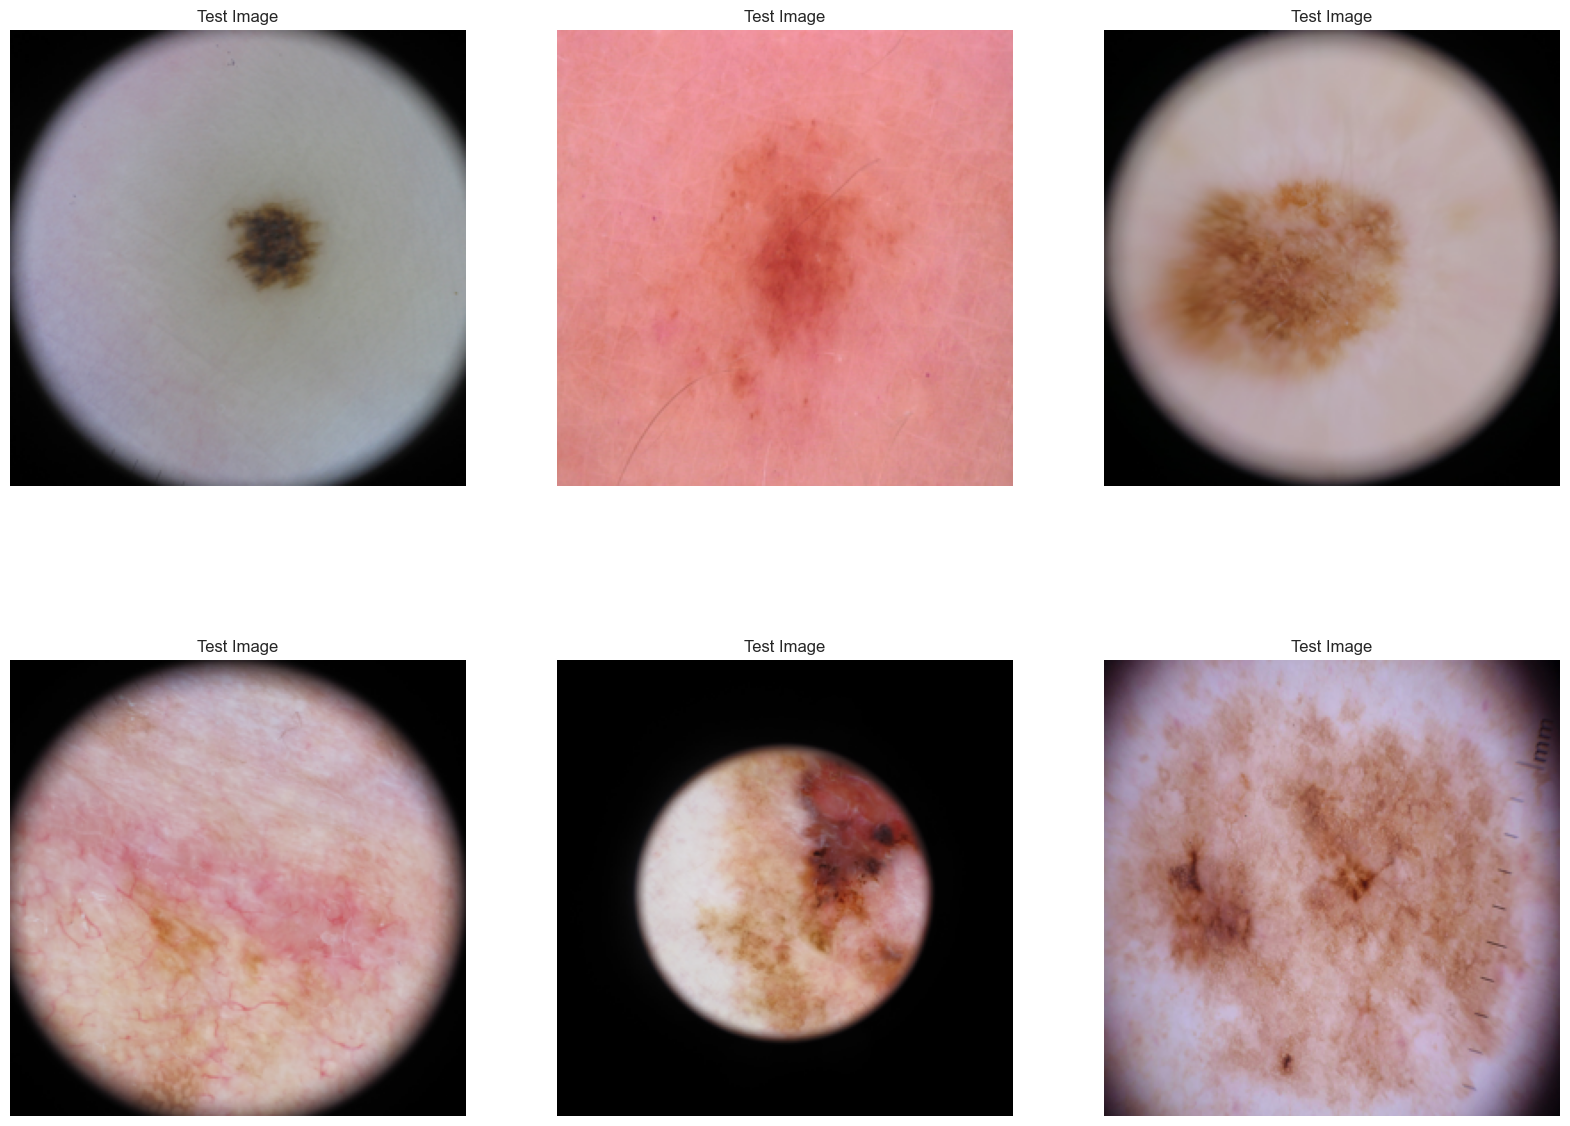

In [20]:
# Set the seaborn style
sns.set_style("white")

# Create a figure
plt.figure(figsize=[20, 15])

for i, image_path in enumerate(test_df["test_resized_images"][:6]):
    # Plot the image
    plt.subplot(2, 3, i + 1)
    plt.imshow(image_path)
    plt.axis("off")
    plt.title("Test Image")

plt.show()

In [21]:
test_intensity_features = pd.DataFrame()
test_intensity_features_list = []

test_glcm_features = pd.DataFrame()
test_glcm_features_list = []

test_lbp_features = pd.DataFrame()
test_lbp_features_list = []

test_shape_features = pd.DataFrame()
test_shape_features_list = []

for index, row in test_df.iterrows():
    test_resized_image = row['test_resized_images']
    intensity_test_feature = extract_intensity_and_color_features(test_resized_image)
    glcm_test_feature = extract_glcm_features(test_resized_image)
    lbp_test_feature = extract_lbp_features(test_resized_image)
    test_intensity_features_list.append(pd.DataFrame(intensity_test_feature, index=[0]))
    test_glcm_features_list.append(pd.DataFrame(glcm_test_feature, index=[0]))
    test_lbp_features_list.append(pd.DataFrame(lbp_test_feature, index=[0]))
    shape_test_feature = extract_shape_features(test_resized_image)
    test_shape_features_list.append(pd.DataFrame(shape_test_feature, index=[0]))

test_intensity_features = pd.concat(test_intensity_features_list, ignore_index=True)
test_glcm_features = pd.concat(test_glcm_features_list, ignore_index=True)
test_lbp_features = pd.concat(test_lbp_features_list, ignore_index=True)
test_shape_features = pd.concat(test_shape_features_list, ignore_index=True)

# Combine intensity features with the original DataFrame
testing_df = pd.concat([test_df, test_intensity_features, test_glcm_features, test_lbp_features, test_shape_features], axis=1)
testing_df.head()

test_img_name       test_img_file  \
0  xxx00001.jpg  testX\xxx00001.jpg   
1  xxx00002.jpg  testX\xxx00002.jpg   
2  xxx00003.jpg  testX\xxx00003.jpg   
3  xxx00004.jpg  testX\xxx00004.jpg   
4  xxx00005.jpg  testX\xxx00005.jpg   

                                 test_resized_images  mean_intensity  \
0  [[[1, 1, 1], [1, 1, 1], [1, 1, 1], [1, 1, 1], ...      127.411987   
1  [[[232, 143, 156], [231, 140, 151], [227, 136,...      165.449081   
2  [[[1, 1, 1], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...      119.720520   
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [1, 1, 1], ...      134.031764   
4  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...       50.522705   

   std_intensity  max_intensity  min_intensity      mean_r      mean_g  \
0      54.842479            188              0  127.139267  125.568604   
1      44.756177            247             45  225.097733  136.320114   
2      66.891463            197              0  134.387039  114.635986   
3      70.902317            220              0  154.761551  124.376022   
4      76.839020            226              0   60.689835   47.444153   

       mean_b  ...   area  circularity  compactness  hu_moments_1  \
0  129.528091  ...   21.0     0.016929    59.070071     12.503185   
1  134.929398  ...    4.0     0.785398     1.273240      0.166667   
2  110.138535  ...   73.0     0.054959    18.195547      0.243849   
3  122.957718  ...   86.5     0.605071     1.652699      0.190090   
4   43.434128  ...  278.5     0.042150    23.724660      0.260877   

   hu_moments_2  hu_moments_3  hu_moments_4  hu_moments_5  hu_moments_6  \
0  1.554922e+02  1.432297e+02  1.411501e+02  2.006958e+04  1.745008e+03   
1  5.169879e-26  2.439575e-21  4.106241e-21  1.209973e-41 -8.249414e-34   
2  8.485938e-03  3.216617e-05  1.908020e-03  3.337525e-07  1.693550e-04   
3  6.739328e-03  7.957924e-04  3.936154e-05  6.955148e-09  2.968497e-06   
4  1.460501e-02  2.002592e-03  3.847445e-04  3.213327e-07  4.491903e-05   

   hu_moments_7  
0  1.383028e+01  
1  4.743777e-42  
2 -3.347277e-07  
3 -3.956576e-10  
4 -1.039187e-07  

[5 rows x 174 columns]

In [24]:
test_features = testing_df.drop(columns=['test_img_name', 'test_img_file', 'test_resized_images'])


In [30]:
# Standardize the data
X_test_scaler = scaler.transform(test_features) 

In [32]:
xgboost_test_predictions = xgboost.predict(X_test_scaler)

In [33]:
xgboost_test_predictions_df = pd.DataFrame({'XGBoost Predictions': xgboost_test_predictions})

In [34]:
xgboost_test_predictions_df

XGBoost Predictions
0                       0
1                       0
2                       1
3                       1
4                       1
...                   ...
6335                    0
6336                    1
6337                    1
6338                    0
6339                    1

[6340 rows x 1 columns]

In [35]:
xgboost_test_predictions_df.to_csv('xgboost_test_predictions.csv', index=False)

In [36]:
# Make predictions on the test data using the Random Forest classifier
random_forest_test_predictions = random_forest.predict(X_test_scaler)

In [37]:
random_forest_test_predictions_df = pd.DataFrame({'Random Forest Predictions': random_forest_test_predictions})

In [38]:
random_forest_test_predictions_df

Random Forest Predictions
0                             0
1                             0
2                             1
3                             1
4                             1
...                         ...
6335                          0
6336                          1
6337                          1
6338                          0
6339                          1

[6340 rows x 1 columns]

In [39]:
random_forest_test_predictions_df.to_csv('random_forest_test_predictions.csv', index=False)

In [40]:
y_test = random_forest_test_predictions

# Calculate accuracy for XGBoost using Random Forest's predictions as y_test
acc_xgboost_vs_random_forest = accuracy_score(y_test, xgboost_test_predictions)

# Print the accuracy of XGBoost compared to Random Forest's predictions
print("Accuracy of XGBoost vs. Random Forest Predictions:", acc_xgboost_vs_random_forest)

Accuracy of XGBoost vs. Random Forest Predictions: 0.9093059936908517


In [45]:
y_testb = pd.read_csv('binary_test_results.csv', header=None)
y_testb

0
0     1
1     0
2     1
3     1
4     1
...  ..
6335  1
6336  1
6337  1
6338  0
6339  1

[6340 rows x 1 columns]

In [60]:
# Calculate accuracy for XGBoost using Random Forest's predictions as y_test
acc_xgboost_vs_danC = accuracy_score(y_testb, xgboost_test_predictions)

# Print the accuracy of XGBoost compared to Random Forest's predictions
print("Accuracy of XGBoost vs. DanC:", acc_xgboost_vs_danC)

Accuracy of XGBoost vs. DanC: 0.8764984227129338


In [61]:
# Calculate accuracy for XGBoost using Random Forest's predictions as y_test
acc_danC_vs_random_forest = accuracy_score(y_testb, random_forest_test_predictions)

# Print the accuracy of XGBoost compared to Random Forest's predictions
print("Accuracy of DanC vs. Random Forest Predictions:", acc_danC_vs_random_forest)

Accuracy of DanC vs. Random Forest Predictions: 0.8858044164037855


In [50]:
from tqdm import tqdm
from sklearn.ensemble import VotingClassifier

# Define individual classifiers
random_forest = RandomForestClassifier(n_estimators=1000, max_depth=30, random_state=42)
xgboost = xgb.XGBClassifier(n_estimators=200, max_depth=10, random_state=42)

# Create a list of tuples, where each tuple contains a classifier's name and the classifier object
classifiers = [
    ('Random Forest', random_forest),
    ('XGBoost', xgboost)
]

# Create a VotingClassifier using hard voting
voting_classifier = VotingClassifier(estimators=classifiers, voting='soft')

# Wrap the fit method with tqdm to monitor training progress
with tqdm(total=1, desc="Training Ensemble") as pbar:
    voting_classifier.fit(X_train_scaler, y_train)
    pbar.update(1)  # Update the progress bar to indicate completion

# Make predictions on the validation set
y_pred_val_ensemble = voting_classifier.predict(X_val_scaler)

# Evaluate the ensemble model
acc_train_ensemble = accuracy_score(y_train, voting_classifier.predict(X_train_scaler))
acc_val_ensemble = accuracy_score(y_val, y_pred_val_ensemble)

print("\nEvaluation on Validation Set (Ensemble):")
print("Training Accuracy (Ensemble):", acc_train_ensemble)
print("Validation Accuracy (Ensemble):", acc_val_ensemble)

# Print confusion matrix for validation set (Ensemble)
print("\nConfusion Matrix (Validation Set - Ensemble):")
print(confusion_matrix(y_val, y_pred_val_ensemble))

# Print classification report for validation set (Ensemble)
print("\nClassification Report (Validation Set - Ensemble):")
print(classification_report(y_val, y_pred_val_ensemble))


Training Ensemble: 100%|██████████| 1/1 [17:29<00:00, 1049.35s/it]



Evaluation on Validation Set (Ensemble):
Training Accuracy (Ensemble): 1.0
Validation Accuracy (Ensemble): 0.8292939936775553

Confusion Matrix (Validation Set - Ensemble):
[[1610  321]
 [ 327 1538]]

Classification Report (Validation Set - Ensemble):
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1931
           1       0.83      0.82      0.83      1865

    accuracy                           0.83      3796
   macro avg       0.83      0.83      0.83      3796
weighted avg       0.83      0.83      0.83      3796



In [51]:
from tqdm import tqdm
from sklearn.ensemble import VotingClassifier

# Define individual classifiers
random_forest = RandomForestClassifier(n_estimators=1000, max_depth=30, random_state=42)
xgboost = xgb.XGBClassifier(n_estimators=200, max_depth=10, random_state=42)

# Create a list of tuples, where each tuple contains a classifier's name and the classifier object
classifiers1 = [
    ('Random Forest', random_forest),
    ('XGBoost', xgboost)
]

# Create a VotingClassifier using hard voting
voting_classifier1 = VotingClassifier(estimators=classifiers1, voting='hard')

# Wrap the fit method with tqdm to monitor training progress
with tqdm(total=1, desc="Training Ensemble") as pbar:
    voting_classifier1.fit(X_train_scaler, y_train)
    pbar.update(1)  # Update the progress bar to indicate completion

# Make predictions on the validation set
y_pred_val_ensemble = voting_classifier1.predict(X_val_scaler)

# Evaluate the ensemble model
acc_train_ensemble = accuracy_score(y_train, voting_classifier1.predict(X_train_scaler))
acc_val_ensemble = accuracy_score(y_val, y_pred_val_ensemble)

print("\nEvaluation on Validation Set (Ensemble):")
print("Training Accuracy (Ensemble):", acc_train_ensemble)
print("Validation Accuracy (Ensemble):", acc_val_ensemble)

# Print confusion matrix for validation set (Ensemble)
print("\nConfusion Matrix (Validation Set - Ensemble):")
print(confusion_matrix(y_val, y_pred_val_ensemble))

# Print classification report for validation set (Ensemble)
print("\nClassification Report (Validation Set - Ensemble):")
print(classification_report(y_val, y_pred_val_ensemble))


Training Ensemble: 100%|██████████| 1/1 [20:14<00:00, 1214.50s/it]



Evaluation on Validation Set (Ensemble):
Training Accuracy (Ensemble): 1.0
Validation Accuracy (Ensemble): 0.8314014752370916

Confusion Matrix (Validation Set - Ensemble):
[[1682  249]
 [ 391 1474]]

Classification Report (Validation Set - Ensemble):
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1931
           1       0.86      0.79      0.82      1865

    accuracy                           0.83      3796
   macro avg       0.83      0.83      0.83      3796
weighted avg       0.83      0.83      0.83      3796



In [52]:
# Make predictions on the test data using the Random Forest classifier
Ensemble_test_predictions = voting_classifier1.predict(X_test_scaler)

Ensemble_test_predictions_df = pd.DataFrame({'Ensemble Predictions': Ensemble_test_predictions})

In [53]:
Ensemble_test_predictions_df

Ensemble Predictions
0                        0
1                        0
2                        1
3                        1
4                        1
...                    ...
6335                     0
6336                     1
6337                     1
6338                     0
6339                     1

[6340 rows x 1 columns]

In [54]:
Ensemble_test_predictions_df.to_csv('ensemble_test_predictions.csv', index=False)

In [59]:
y_test = random_forest_test_predictions

# Calculate accuracy for XGBoost using Random Forest's predictions as y_test
acc_ensemble_vs_random_forest = accuracy_score(y_test, Ensemble_test_predictions)

# Print the accuracy of XGBoost compared to Random Forest's predictions
print("Accuracy of ensemble vs. Random Forest Predictions:", acc_ensemble_vs_random_forest)

Accuracy of ensemble vs. Random Forest Predictions: 0.9550473186119873


In [58]:

y_test =xgboost_test_predictions

# Calculate accuracy for XGBoost using Random Forest's predictions as y_test
acc_xgboost_vs_ensemble = accuracy_score(y_test, Ensemble_test_predictions)

# Print the accuracy of XGBoost compared to Random Forest's predictions
print("Accuracy of XGBoost vs. ensemble:", acc_xgboost_vs_ensemble)

Accuracy of XGBoost vs. ensemble: 0.9542586750788643


In [62]:
# Calculate accuracy for XGBoost using Random Forest's predictions as y_test
acc_danC_vs_ensemble = accuracy_score(y_testb, Ensemble_test_predictions)

# Print the accuracy of XGBoost compared to Random Forest's predictions
print("Accuracy of DanC vs. ensemble Predictions:", acc_danC_vs_ensemble)

Accuracy of DanC vs. ensemble Predictions: 0.8790220820189274
